In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from keras import regularizers

2024-03-04 12:02:29.749034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Завантаження даних Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Нормалізація значень пікселів до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Побудова моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Вхідний шар
    layers.Dense(128, activation='relu'),  # Повністю зв'язаний шар з ReLU
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),   # Додатковий повністю зв'язаний шар з ReLU
    layers.Dense(10, activation='softmax') # Вихідний шар з softmax
])

In [11]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=20, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.6729 - accuracy: 0.7657 - val_loss: 0.4473 - val_accuracy: 0.8406
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4208 - accuracy: 0.8479 - val_loss: 0.4001 - val_accuracy: 0.8572
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3738 - accuracy: 0.8647 - val_loss: 0.3803 - val_accuracy: 0.8637
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3462 - accuracy: 0.8736 - val_loss: 0.3564 - val_accuracy: 0.8710
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3265 - accuracy: 0.8810 - val_loss: 0.3652 - val_accuracy: 0.8688
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3155 - accuracy: 0.8836 - val_loss: 0.3447 - val_accuracy: 0.8769
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3023 - accuracy: 0.8889 - val_loss: 0.3363 - val_accuracy: 0.8778
Epoch 

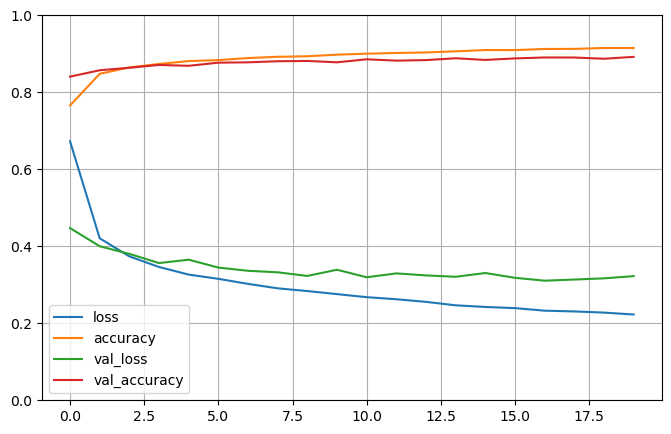

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8920
Test accuracy: 0.8920000195503235


313/313 [==============================] - 1s 2ms/step


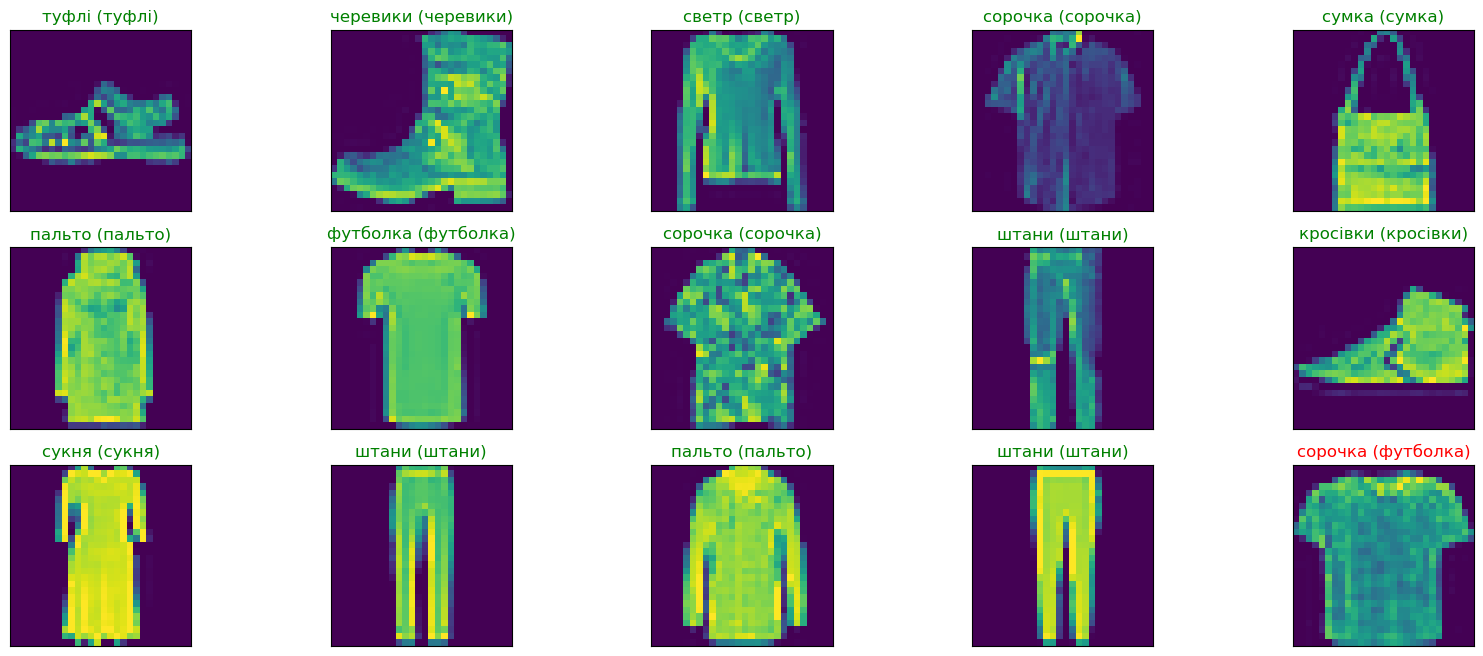

In [9]:
classes = ['футболка', 'штани', 'светр', 'сукня', 'пальто',
           'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

y_hat = model.predict(test_images)
X_test = test_images.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))